## PCA - USArrests data set analysis 

### L Jordaan

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
%matplotlib inline


In [2]:
# Load data
df_arrests = pd.read_csv('USArrests.csv', index_col=0)
df_arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


### Data Cleaning and Preprocessing



In [30]:
df_arrests.shape

(50, 4)

##### Get the statistical summary of the data set

In [5]:
#To set the decimal precision:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

#The describe function give us insight into the statistical properties of the columns
stats = df_arrests.describe()
selected_stats = stats.loc[["mean","std","min","max"]].transpose() #select relevant rows
selected_stats

,mean,std,min,max
Murder,7.79,4.36,0.80,17.40
Assault,170.76,83.34,45.00,337.00
UrbanPop,65.54,14.47,32.00,91.00
Rape,21.23,9.37,7.30,46.00


##### Determine if any missing values are present in the data

In [6]:
# Count missing values
missing = df_arrests.isnull().sum()
relevant_missing = pd.DataFrame(missing, columns=["missing"])
relevant_missing


,missing
Murder,0
Assault,0
UrbanPop,0
Rape,0


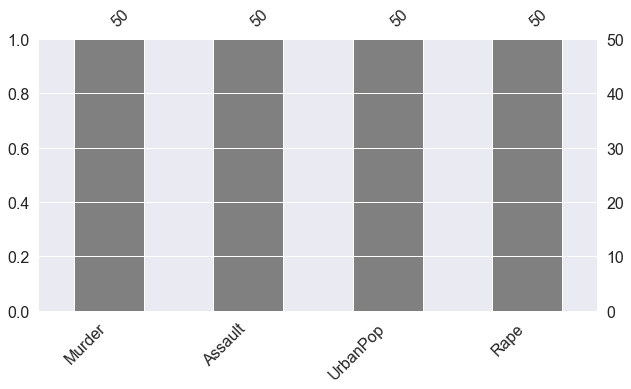

In [7]:
# missingno bar plot
msno.bar(df_arrests, figsize=(10,5), color='grey')
plt.show()

As shown in the table above we have zero missing columns in our data set, which is good

In [8]:
df_arrests.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00,50.00,50.00,50.00
mean,7.79,170.76,65.54,21.23
std,4.36,83.34,14.47,9.37
min,0.80,45.00,32.00,7.30
25%,4.08,109.00,54.50,15.07
50%,7.25,159.00,66.00,20.10
75%,11.25,249.00,77.75,26.18
max,17.40,337.00,91.00,46.00


We have a data set of 4 columns with 50 rows

In [9]:
df_arrests.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


We have no missing values in the data set and we have 2 'integer' columns and 2 'float' columns

In [10]:
df_arrests.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

We have no zero values in our data set. Thus there will be no need for 'imputation'.

#### Histograms depicting our Columns:

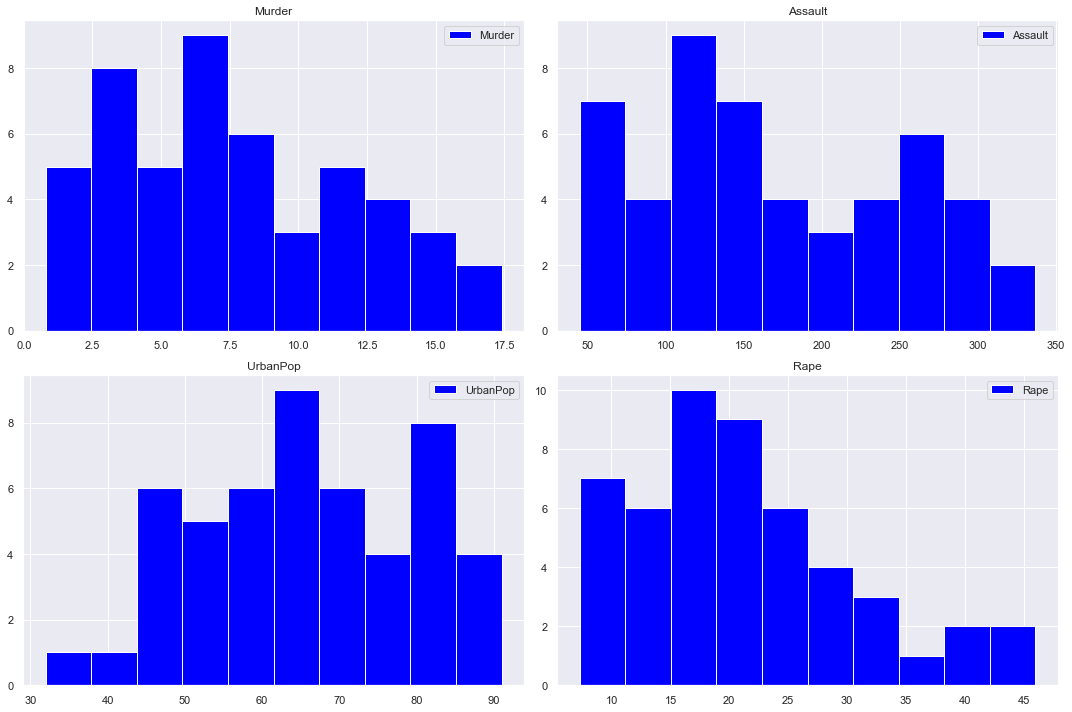

In [11]:
# Plot histograms
histograms = df_arrests.hist(color='blue', grid=True, figsize=(15, 10), legend=True) 
plt.tight_layout()
plt.show()


In the above histograms we can see that Murder and Assault is skewed to the left where as UrbanPop and Rape are more skewed to the right.

#### Correlation Matrix

In [12]:
states = df_arrests.index
corr_df = df_arrests.corr()
labels =df_arrests.columns

correlations = corr_df.corr()

<AxesSubplot:>

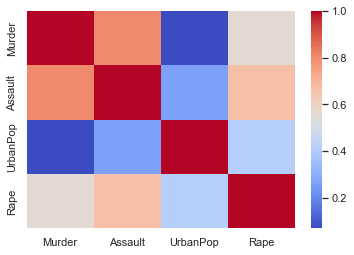

In [13]:
import seaborn as sns
sns.heatmap(corr_df, cmap="coolwarm")


In the above correlation matrix the Murder and Assault and Rape have very strong positive correlation and then Murder, Assault and Urban population.


<AxesSubplot:>

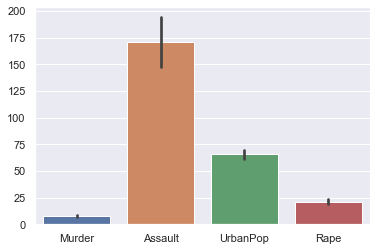

In [14]:
# Plotting the data
sns.barplot(data=df_arrests)


## PCA

Principal Components Analysis (PCA) is a method for finding the underlying variables (i.e. principal components) that best differentiate the observations by determining the directions along which your data points are most spread out. Since the determination of the principal components is based on finding the direction that maximises the variance, variables with variance that are much higher than the other variables tend to dominate the analysis purely due to their scale. PCA is a dimensionality reduction techinque which is useful when we have a lot of variables, and need to reduce these. 



In [44]:
X = df_arrests.iloc[:, 0:4]

In [54]:
from sklearn.decomposition import PCA 

np.set_printoptions(precision=2)

pca = PCA()

X_trans = pca.fit_transform(X)

df_pca = pd.DataFrame(X_trans)
df_pca.head()

,0,1,2,3
0,64.802,11.448,-2.495,2.408
1,92.827,17.983,20.127,-4.094
2,124.068,-8.830,-1.687,-4.354
3,18.340,16.704,0.210,-0.521
4,107.423,-22.520,6.746,-2.812


In [55]:
(pca.explained_variance_ratio_)

array([9.66e-01, 2.78e-02, 5.80e-03, 8.49e-04])

In [56]:
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [83.73 14.21  6.49  2.48]


In [57]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [9.66e-01 2.78e-02 5.80e-03 8.49e-04]


In [58]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [7011.11 7213.11 7255.22 7261.38]


In [59]:
print(abs( pca.components_ ))

[[0.04 1.   0.05 0.08]
 [0.04 0.06 0.98 0.2 ]
 [0.08 0.07 0.2  0.97]
 [0.99 0.04 0.06 0.07]]


By Printing out the components we can see from all the columns basically its only variables 'Murder' and 'Assault' that explains most of our data and are most important 

### Standardise the Data

In [61]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

std_pca = PCA()
X_std_trans = std_pca.fit_transform(X_std)

df_std_pca = pd.DataFrame(X_std_trans)
df_std_pca.head()

,0,1,2,3
0,0.986,1.133,-0.444,0.156
1,1.950,1.073,2.040,-0.439
2,1.763,-0.746,0.055,-0.835
3,-0.141,1.120,0.115,-0.183
4,2.524,-1.543,0.599,-0.342


### Feature Importance

In [62]:
def biplot(score,coeff,labels=None,points=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex,ys * scaley,s=5)

    for i in range(0,len(xs)):
        txt = states[i]
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

    # Adapted from: https://ostwalprasad.github.io/machine-learning/PCA-using-python.html

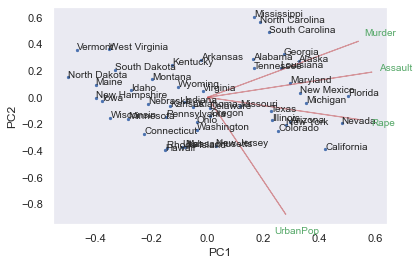

In [63]:
biplot(X_std_trans[:,0:2],np.transpose(std_pca.components_[0:2, :]),list(labels))
plt.show()

### The Most Important features explaining 90% of the Data

In [64]:
np.random.seed(0)

# 20 samples with 2 features
train_features = np.random.rand(20,2)

model = PCA(n_components=2).fit(train_features)
X_trans = model.transform(train_features)

# number of components
n_pcs= model.components_.shape[0]

most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = ['Murder','Assault','UrbanPop','Rape']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())
df.head()

,0,1
0,PC0,Murder
1,PC1,Assault


Seeing above our most important components explaining our data from our PCA analysis is the feature 'Assault' followed by 'Murder'

### PCA 1 and PCA 2 Importance by Feature

In [65]:
# Feature importance
pd.set_option('display.float_format', lambda x: '%.3f' % x) #change precision to see more decimal places

pc1 = abs( pca.components_[0] ) #components x features - access at index 0 to get the first component
pc2 = abs( pca.components_[1] )

feat_df = pd.DataFrame()
feat_df["Features"] = list(labels)
feat_df["PCA_1 Importance"] = pc1
feat_df["PCA_2 Importance"] = pc2
feat_df

,Features,PCA_1 Importance,PCA_2 Importance
0,Murder,0.042,0.045
1,Assault,0.995,0.059
2,UrbanPop,0.046,0.977
3,Rape,0.075,0.201


In the Above table; we see the features and their respective PC1 and PC2 corresponding values. 
For PC1 'Assault' is the highest by far. For PC2 'UrbanPop' is the highest.

#### Graphical Depiction of Feature Importance

Text(0.5, 1.0, 'Cumulative Explained Variance')

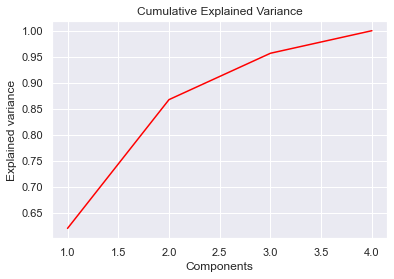

In [66]:
# Cumulative variance plot
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(std_pca.explained_variance_ratio_ )+1),
         np.cumsum(std_pca.explained_variance_ratio_),
         c='red')
plt.title("Cumulative Explained Variance")

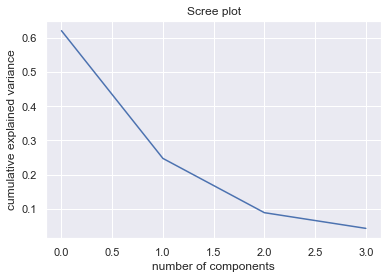

In [67]:
# Scree plot
plt.plot(std_pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title("Scree plot")
plt.show()

The first 2 principal components together explain around 90% of the variance. We can therefore use them to perform cluster analysis. This is what we refer to as dimensionality reduction. We began with 4 variables and now we have 2 variables explaining most of the variability. 

In [83]:
# Creating pandas dataframe from numpy array
pca_df = pd.DataFrame({'0': df_std_pca.iloc[:, 0], '1': df_std_pca.iloc[:, 1]}, index=df_std_pca.index)

pca_df.head()

,0,1
0,0.986,1.133
1,1.950,1.073
2,1.763,-0.746
3,-0.141,1.120
4,2.524,-1.543


## Hierarchical clustering


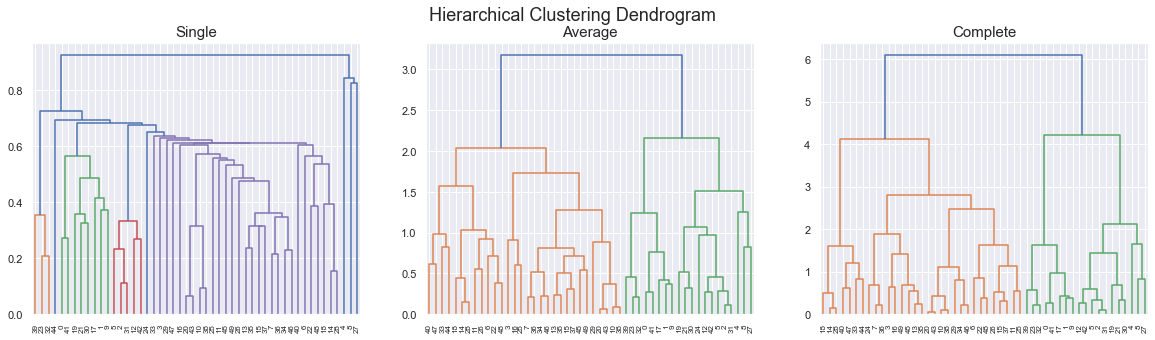

In [104]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(pca_df)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Hierarchical Clustering Dendrogram', fontsize=18)
ax1.set_title("Single",fontsize=15)
dendrogram(linkage(pca_df, method='single'), labels=pca_df.index, ax=ax1) #change method: eg. single, average, complete...
ax2.set_title("Average", fontsize=15)
dendrogram(linkage(pca_df, method='average'), labels=pca_df.index, ax=ax2)
ax3.set_title("Complete", fontsize=15)
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index, ax=ax3)

plt.show()

Here we see the 3 different hierarchical Cluster dendograms. From the clusterings above it looks like the 'Complete' method is the most suitable and will be used in the calculations going forward.

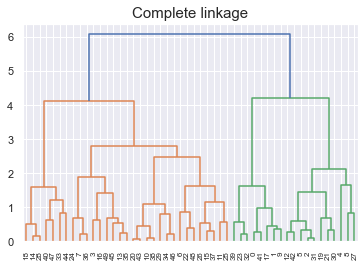

In [106]:
plt.title("Complete linkage", fontsize=(15))
dendrogram(linkage(pca_df, method='complete'), labels=pca_df.index)
plt.show()

### K-means clustering

K-means is a very popular clustering partitioning algorithm that is fast and efficient and scales well for large datasets. It is an iterative process, so observations can switch between clusters while the algorithm runs until it converges at a local optimum. This method is not robust when it comes to noise data and outliers and is not suitable for clusters with non-convex shapes. Another drawback with K-means is the necessity of specifying K in advance.

For our analysis, it seems that the shape of clusters is likely to be regular based on the PCA biplot. K will be set to 3. A visualisation of the clusters is shown in the figure below.


Text(0, 0.5, 'Dim 1')

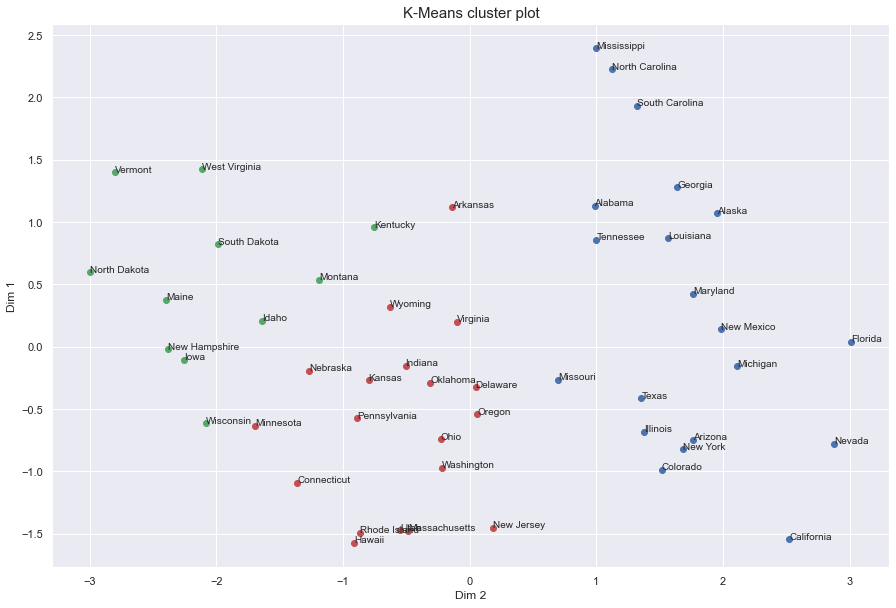

In [140]:
from sklearn.cluster import KMeans

# We extract the first two components
x = X_std_trans[:,0]
y = X_std_trans[:,1]

# Fit k-means
k=3
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(pca_df)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots(figsize=(15,10))
colours = 'rbgy'
for i in range(0,k):
    ax.scatter(x[cluster_labels == i],y[cluster_labels == i],c = colours[i]) 

for i in range(0,len(x)):
        txt = states[i]
        ax.annotate(txt, (x[i], y[i]))
ax.set_title("K-Means cluster plot", fontsize=(15))
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")


In [167]:
# Adding the Clusters to the dataframe
cluster_labels = kmeans.fit_predict(pca_df)
df = pd.DataFrame(cluster_labels, index=states)
df_arrests['Clusters'] = cluster_labels    
df_arrests.head()


,Murder,Assault,UrbanPop,Rape,Clusters
Alabama,13.200,236,58,21.200,1
Alaska,10.000,263,48,44.500,1
Arizona,8.100,294,80,31.000,1
Arkansas,8.800,190,50,19.500,0
California,9.000,276,91,40.600,1


## REFERENCES


1. https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html
2. https://www.kaggle.com/code/shrutimechlearn/step-by-step-pca-with-iris-dataset
3. https://www.kaggle.com/code/abhishekkrg/python-iris-data-visualization-and-explanation
4. https://medium.com/swlh/an-intuitive-approach-to-pca-fc4d05c14c19
5. https://machinelearningmastery.com/principal-component-analysis-for-visualization/
6. https://www.datacamp.com/tutorial/principal-component-analysis-in-python
